# Project Machine learning Détection des fausses nouvelles

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
import re 
import string
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokeniz

In [2]:
data = pd.read_csv('modified_data1.csv')


In [3]:
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78469 entries, 0 to 78468
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  78469 non-null  int64 
 1   title       77911 non-null  object
 2   text        78430 non-null  object
 3   label       78469 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [5]:
data["text"].describe()

count     78430
unique    62718
top            
freq        774
Name: text, dtype: object

## Ratio de vraies et fausses informations : 

In [6]:
lb=data.label
lb.value_counts(normalize=True)

FAKE    0.513196
REAL    0.486804
Name: label, dtype: float64

# #  les valeurs null 'NaN'

In [7]:
Nul_data =data.isnull().sum()
Nul_data

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

<AxesSubplot:>

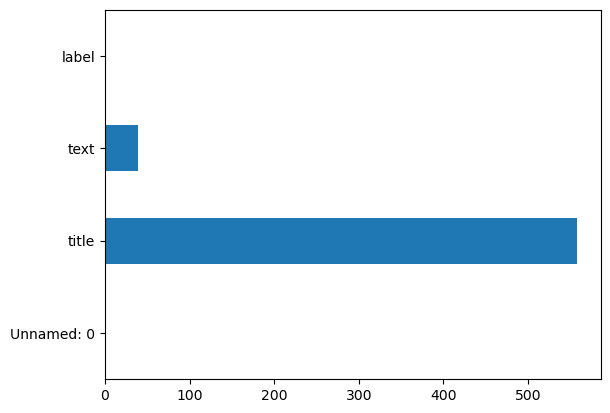

In [8]:
Nul_data.plot(kind="barh")

In [9]:
data = data.fillna('')
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
data.nunique()

Unnamed: 0    72134
title         62348
text          62719
label             2
dtype: int64

#  Supprimer les colonne indésirable

In [11]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)


In [12]:
data.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [13]:
data['text_title'] =   data['title'] + data['text']

In [14]:
data.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                          text_title  
0  You Can Smell Hillary’s FearDaniel Greenfield,...  
1  Watch The Exact Moment Paul Ryan Committed Pol...  
2  Kerry to go to Paris in gesture of sympathyU.S...  
3  Bernie supporters on Twitter erupt in anger ag...  
4  The Battle of New York: Why This Primary Matte...

In [15]:
def len_body (i):
   
    return  len(i) - i.count(" ")

   

data['body_len'] = data['text_title'].apply(len_body)   

data.head()
    
    

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                          text_title  body_len  
0  You Can Smell Hillary’s FearDaniel Greenfield,...      6245  
1  Watch The Exact Moment Paul Ryan Committed Pol...      2273  
2  Kerry to go to Paris in gesture of sympathyU.S...      2156  
3  Bernie supporters on Twitter erupt in anger ag...      2327  
4  The Battle of New York: Why This Primary Matte...      1574

# #Comparaison de la distribution de la longueur du corps entre les articles de fausses et de vraies informations.








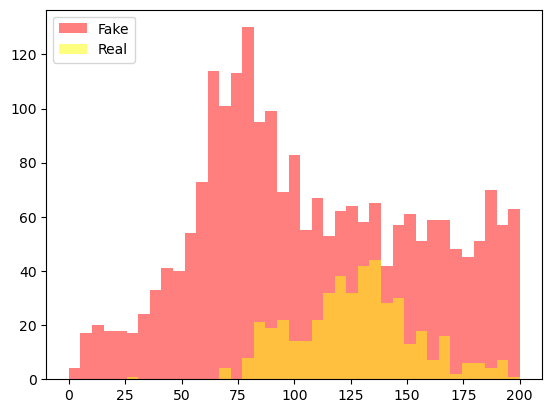

In [16]:
bins = np.linspace(0, 200, 40)
plt.hist(data[data["label"]== 'FAKE']["body_len"], bins, alpha=0.5, label="Fake", color='red')
plt.hist(data[data["label"]== 'REAL']["body_len"], bins, alpha=0.5, label="Real", color='yellow')


plt.legend(loc="upper left")
plt.show()

# Le modèle de "Bag of Words"

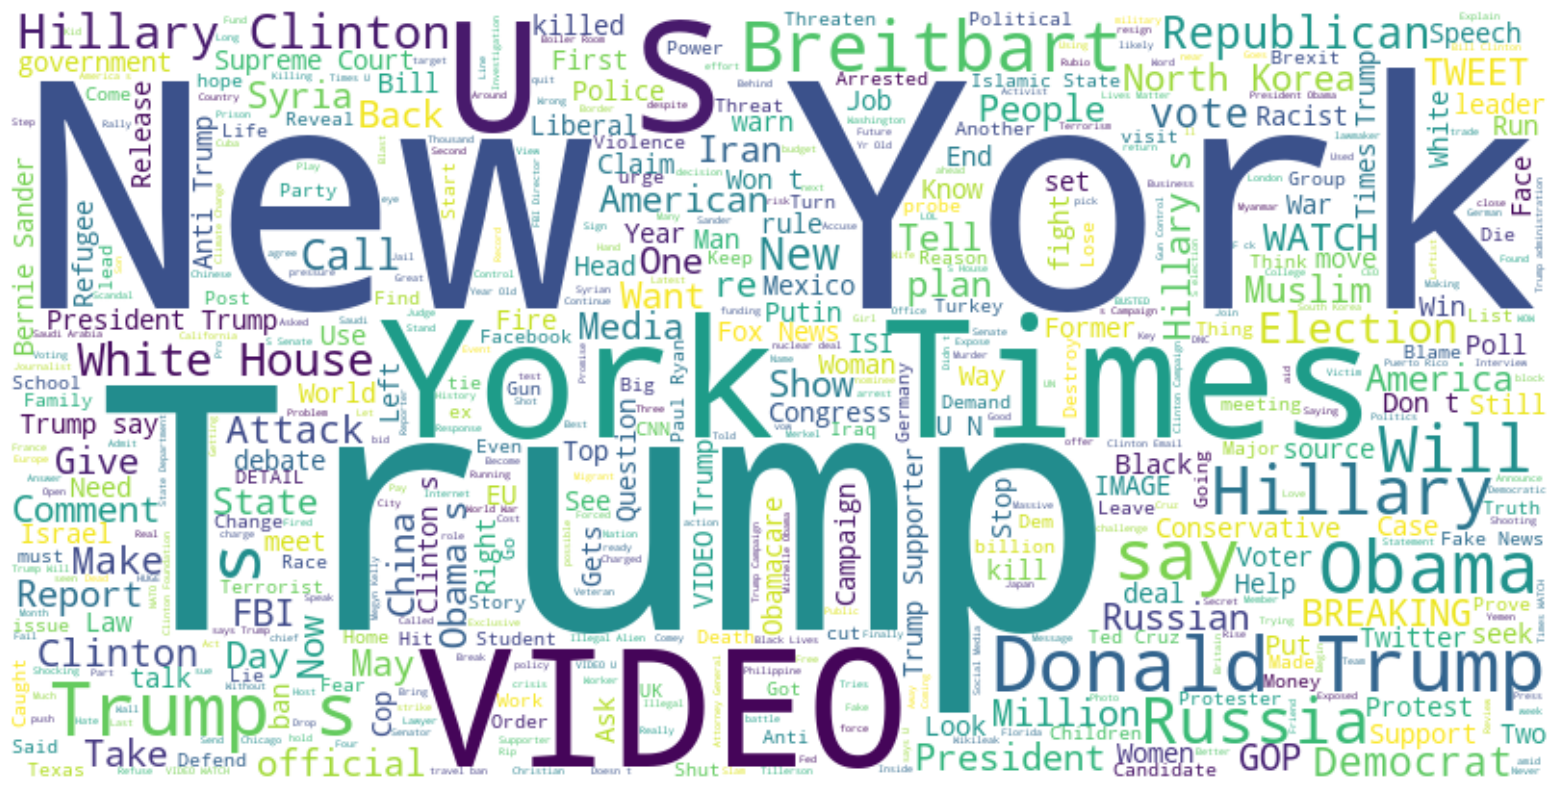

In [17]:
titles = ' '.join(title for title in data['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=1000,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

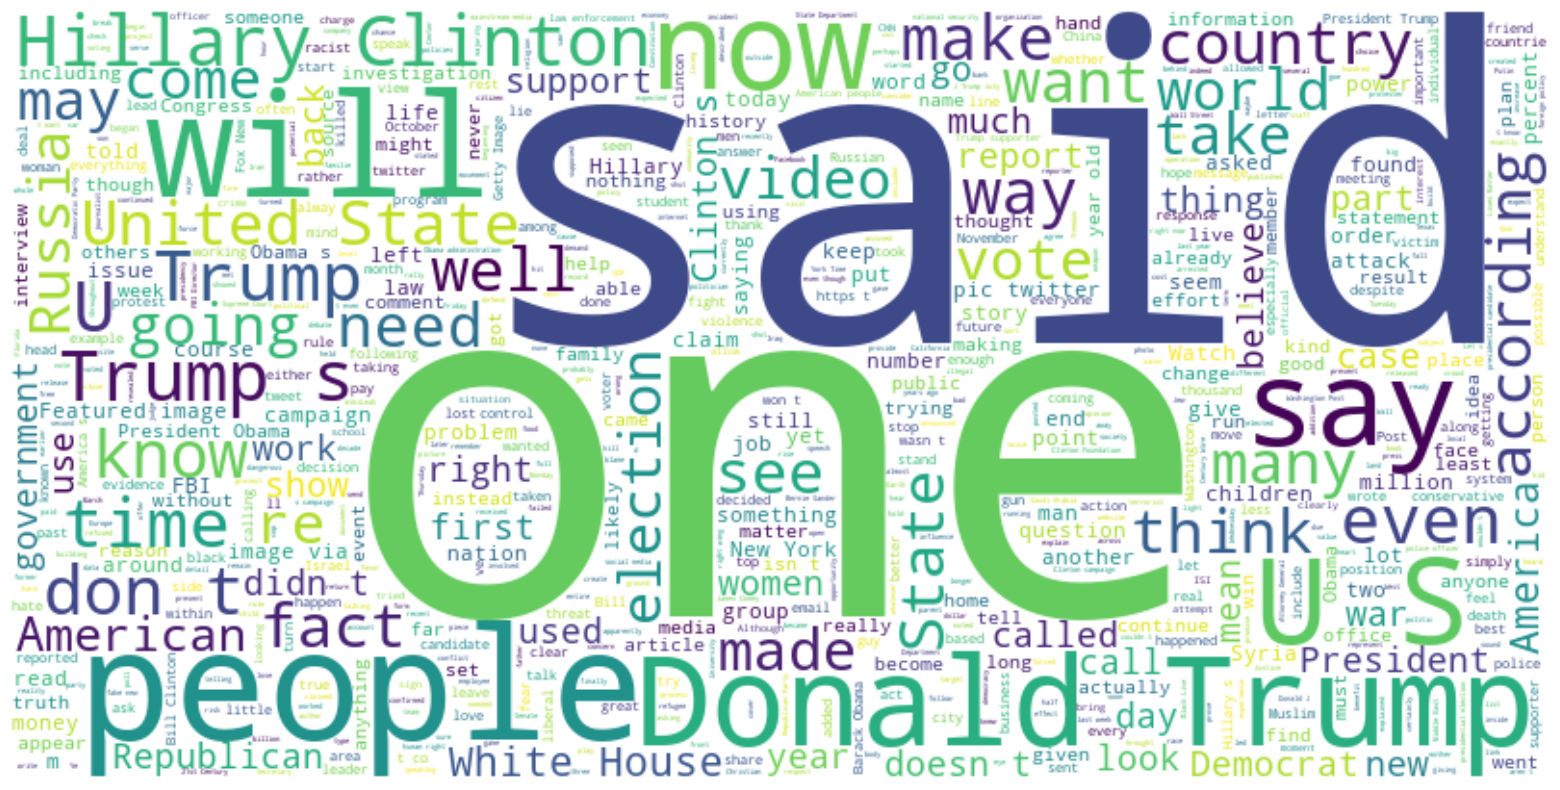

In [18]:
fake_news= data["text_title"][data["label"]== 'FAKE']

fakes = ' '.join(fake for fake in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=800,
    width=800, 
    height=400,
).generate(fakes)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

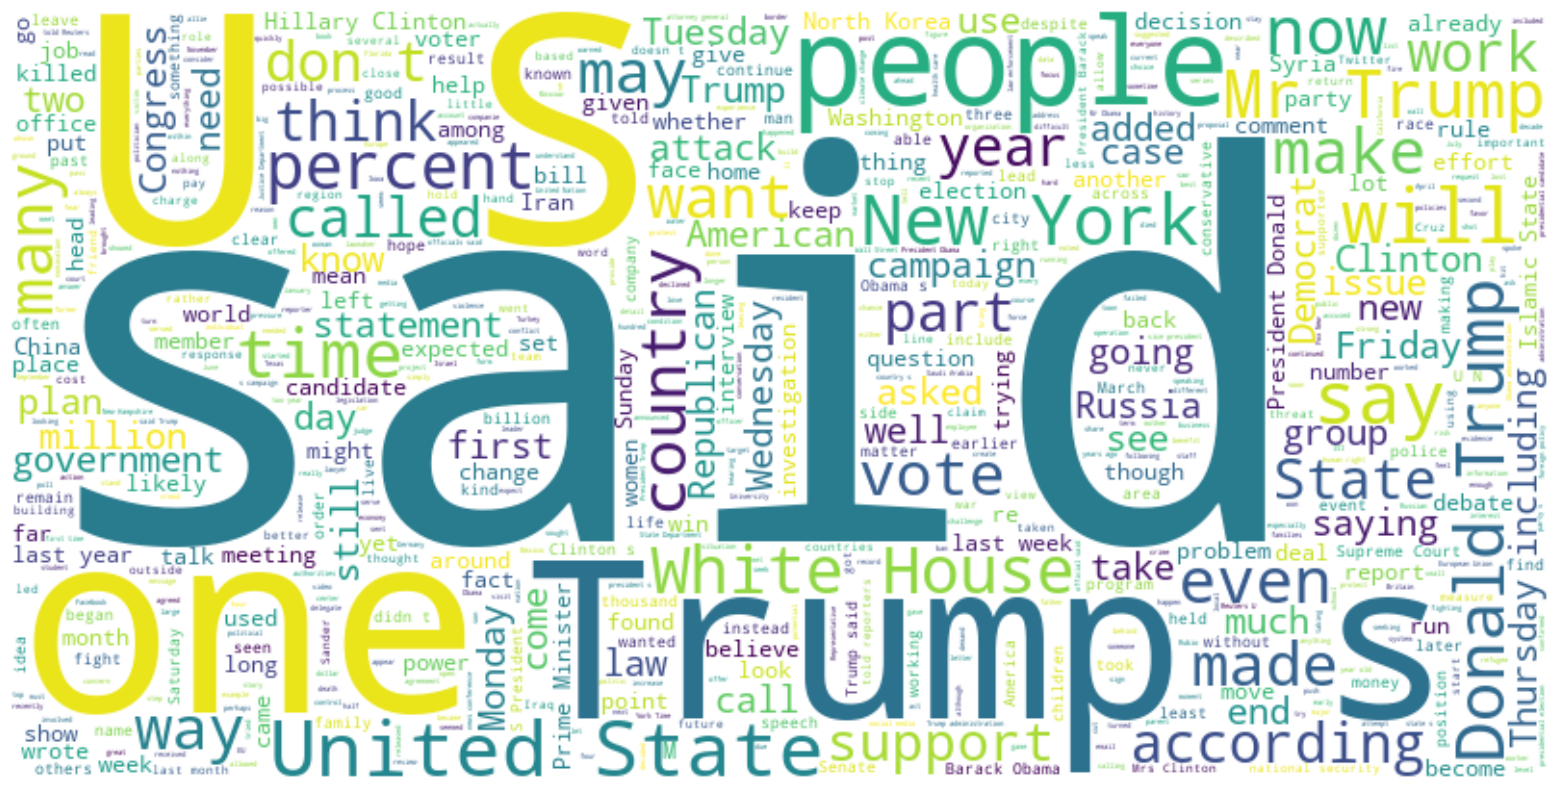

In [19]:
real_news= data["text_title"][data["label"] == 'REAL']
reals = ' '.join(real for real in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=800,
    width=800, 
    height=400,
).generate(reals)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

max_df=0.7 : J'ai fixé une limite de fréquence maximale à 0.7, ce qui signifie que les mots apparaissant dans plus de 70% des documents seront ignorés. Cela élimine les termes trop fréquents et souvent peu informatifs.

In [20]:
tfid= TfidfVectorizer(stop_words="english", max_df=0.7)

In [21]:
def to_lowercase(text):
    return text.lower()

data['text']=data['text'].apply(to_lowercase)


In [22]:
def preparation_data(text):
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'<.*?>+', '', text)
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub(r'\n', '', text)
        text = re.sub(r'\w*\d\w*', '', text)
        return text
    
data['text']=data['text'].apply(preparation_data)


In [23]:

def stem_text(text):
    tokens = word_tokenize(text)  
    stemmer = PorterStemmer()  
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  
    return ' '.join(stemmed_tokens)  


data['text']=data['text'].apply(stem_text)


# Entraîner le modèle de classification Passive Aggressive (PA) et Random Forest (RM)

In [24]:
y = data.label
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.10, random_state=53)

In [25]:
train_tfid = tfid.fit_transform(X_train)
test_tfid = tfid.transform(X_test)


In [26]:
ps_model = PassiveAggressiveClassifier(max_iter=150)
ps_model.fit(train_tfid,y_train)

PassiveAggressiveClassifier(max_iter=150)

In [27]:
ps_predictions = ps_model.predict(test_tfid)

In [28]:

print("Accuracy score: ",accuracy_score(y_test,ps_predictions))
print("Confusion Matrix: \n",confusion_matrix(y_test,ps_predictions))
print("f1 score: ",f1_score(y_test, ps_predictions, pos_label='REAL'))

Accuracy score:  0.9650821970179686
Confusion Matrix: 
 [[3869  122]
 [ 152 3704]]
f1 score:  0.9643322051549076


In [29]:
sample_news= ['I publicly say, ‘Thank you President George W. Bush,’ for making sure that we got the money that we needed to rebuild our city,” Ms. Clinton said. She also touted her record working for the borough after the attacks, including sounding the alarm on air quality and pushing for the passage of the Zadroga Act. Ms. Clinton went on to discuss her foreign policy experience, saying anyone who wants to president has to be able to offer specifics on what they would do—an allusion to her Democratic rival Vermont Sen. Bernie Sanders—but also has to be able to keep people safe. “Maybe we take that more seriously here in New York, but we should,” she said. “And we are going to do everything we can to keep America safe.” She cited her work building a coalition that “brought Iran to the negotiating table,” without mentioning how controversial that final Iran deal was for President Barack Obama. Ms. Clinton’s rally had little in common with Mr. Trump’s Staten Island event, except one thing: the crowd at both seemed to hate Republican Texas Sen. Ted Cruz. Ms. Clinton mentioned his plan to spy on Muslim neighborhoods, which has also been dismissed by Police Commissioner Bill Bratton. At the mention of Mr. Cruz’s name, the crowd offered a chorus of boos. The crowd had been hyped up for Ms. Clinton before she even arrived, and gave a nice response to several local pols as they urged people to get out the vote on Tuesday. “Hillary is the only one with the experience,” said Councilwoman Debi Rose, a Democrat who represents the borough’s North Shore. “She knows what it’s like to be in the White House. She knows the realities. She knows that living and running the White House in this country is not a reality show.” Ms. Clinton, at the end of her speech, offered the kind of promise Staten Island always loves—and the kind it holds politicians to, if the way the Staten Island Advance repeatedly agitated and inquired about a town hall Mayor Bill de Blasio will finally hold here on Wednesday night is any indication. “I want you to hold me accountable,” Ms. Clinton said. “I will be coming back to Staten Island when I am your presidents'] 
sample_news = [preparation_data(w) for w in sample_news ]
sample_news= [stem_text(w) for w in sample_news ]
test1= tfid.transform(sample_news)
ps_model.predict(test1)

array(['REAL'], dtype='<U4')

In [30]:
rf = RandomForestClassifier(n_estimators=60, max_depth=None, n_jobs=-1)

rf_model = rf.fit(train_tfid, y_train)

y_pred = rf_model.predict(test_tfid)

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("f1 score: ",f1_score(y_test, y_pred, pos_label='REAL'))


Accuracy score:  0.9469861093411495
Confusion Matrix: 
 [[3842  149]
 [ 267 3589]]
f1 score:  0.9452199104556228


In [31]:
sample_news1= ['I publicly say, ‘Thank you President George W. Bush,’ for making sure that we got the money that we needed to rebuild our city,” Ms. Clinton said. She also touted her record working for the borough after the attacks, including sounding the alarm on air quality and pushing for the passage of the Zadroga Act. Ms. Clinton went on to discuss her foreign policy experience, saying anyone who wants to president has to be able to offer specifics on what they would do—an allusion to her Democratic rival Vermont Sen. Bernie Sanders—but also has to be able to keep people safe. “Maybe we take that more seriously here in New York, but we should,” she said. “And we are going to do everything we can to keep America safe.” She cited her work building a coalition that “brought Iran to the negotiating table,” without mentioning how controversial that final Iran deal was for President Barack Obama. Ms. Clinton’s rally had little in common with Mr. Trump’s Staten Island event, except one thing: the crowd at both seemed to hate Republican Texas Sen. Ted Cruz. Ms. Clinton mentioned his plan to spy on Muslim neighborhoods, which has also been dismissed by Police Commissioner Bill Bratton. At the mention of Mr. Cruz’s name, the crowd offered a chorus of boos. The crowd had been hyped up for Ms. Clinton before she even arrived, and gave a nice response to several local pols as they urged people to get out the vote on Tuesday. “Hillary is the only one with the experience,” said Councilwoman Debi Rose, a Democrat who represents the borough’s North Shore. “She knows what it’s like to be in the White House. She knows the realities. She knows that living and running the White House in this country is not a reality show.” Ms. Clinton, at the end of her speech, offered the kind of promise Staten Island always loves—and the kind it holds politicians to, if the way the Staten Island Advance repeatedly agitated and inquired about a town hall Mayor Bill de Blasio will finally hold here on Wednesday night is any indication. “I want you to hold me accountable,” Ms. Clinton said. “I will be coming back to Staten Island when I am your president'] 
sample_news1 = [preparation_data(w) for w in sample_news1 ]
sample_news1= [stem_text(w) for w in sample_news1 ]
test1= tfid.transform(sample_news1)
rf_model.predict(test1)

array(['REAL'], dtype=object)

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(train_tfid, y_train)

MultinomialNB()

In [33]:
pred = nb_classifier.predict(test_tfid)

In [34]:
print("Accuracy score: ",accuracy_score(y_test,pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
print("f1 score: ",f1_score(y_test, pred, pos_label='REAL'))


Accuracy score:  0.8655537147954633
Confusion Matrix: 
 [[3468  523]
 [ 532 3324]]
f1 score:  0.8630403738803064


In [35]:
nb_classifier.predict(test1)

array(['REAL'], dtype='<U4')

In [36]:
import pickle
pickle.dump(ps_model, open('classifier.pkl', 'wb'))

pickle.dump(tfid, open('tfidf_vectorizer.pkl', 'wb'))